zadanie 1

In [49]:
import numpy as np

d = {
    "normal": 0,
    "strassen": 0
}

def normal(A, B, size):
    C = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            for l in range(size):
                C[i][j] += A[i][l] * B[l][j]
                d["normal"] += 2  
    return C

def strassen(A, B, l):
    n = A.shape[0]

    if n <= 2**l:
        result = normal(A, B, n)
        d["strassen"] += d["normal"]
        return result

    half = n // 2

    A11, A12, A21, A22 = A[:half, :half], A[:half, half:], A[half:, :half], A[half:, half:]
    B11, B12, B21, B22 = B[:half, :half], B[:half, half:], B[half:, :half], B[half:, half:]

    P1 = strassen(A11 + A22, B11 + B22, l)
    P2 = strassen(A21 + A22, B11, l)
    P3 = strassen(A11, B12 - B22, l)
    P4 = strassen(A22, B21 - B11, l)
    P5 = strassen(A11 + A12, B22, l)
    P6 = strassen(A21 - A11, B11 + B12, l)
    P7 = strassen(A12 - A22, B21 + B22, l)

    C11 = P1 + P4 - P5 + P7
    C12 = P3 + P5
    C21 = P2 + P4
    C22 = P1 - P2 + P3 + P6

    C = np.vstack((np.hstack((C11, C12)), np.hstack((C21, C22))))
    d["strassen"]+=18
    return C




zbieranie danych

In [ ]:

k_values = range(2, 9)   
l_candidates = [2, 3, 4]  

results_times = {}  
results_ops = {}    

for l in l_candidates:
    times_for_l = []
    ops_for_l = []
    sizes_for_l = []

    for k in k_values:
        size = 2**k
        rngA = np.random.default_rng(42)
        rngB = np.random.default_rng(43)
        A = np.trunc(rngA.random((size, size)) * 10)
        B = np.trunc(rngB.random((size, size)) * 10)

        d["normal"] = 0
        d["strassen"] = 0

        # Pomiar czasu
        start = time.perf_counter()
        C = strassen(A, B, l)
        end = time.perf_counter()

        elapsed = end - start
        total_ops = d["strassen"] + d["normal"]


        sizes_for_l.append(size)
        times_for_l.append(elapsed)
        ops_for_l.append(total_ops)

    results_times[l] = (sizes_for_l, times_for_l)
    results_ops[l] = (sizes_for_l, ops_for_l)

wykres 1

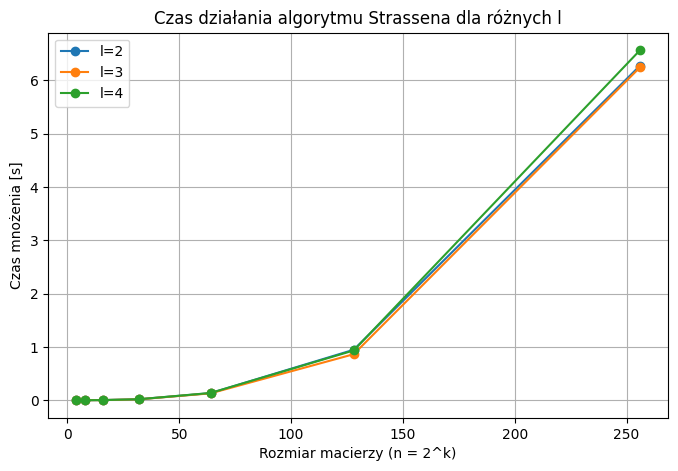

In [51]:
# -----------------------------------
# 1) Wykres: rozmiar vs. czas
# -----------------------------------
plt.figure(figsize=(8, 5))
for l in l_candidates:
    x_sizes, y_times = results_times[l]
    plt.plot(x_sizes, y_times, marker='o', label=f'l={l}')

plt.xlabel('Rozmiar macierzy (n = 2^k)')
plt.ylabel('Czas mnożenia [s]')
plt.title('Czas działania algorytmu Strassena dla różnych l')
plt.legend()
plt.grid(True)
plt.show()

wykres 2

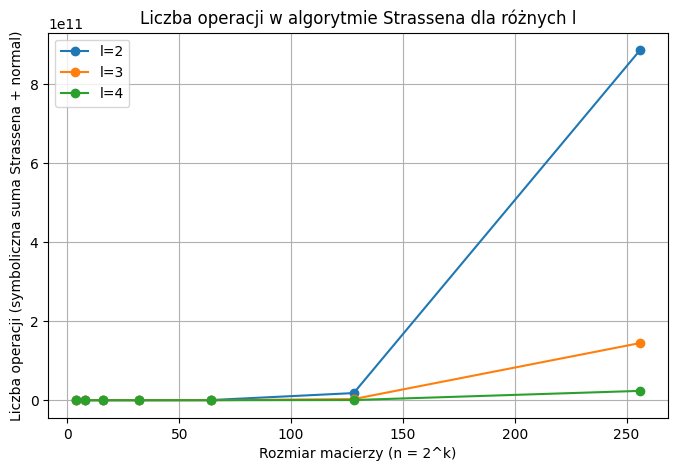

In [52]:
# -----------------------------------
# 2) Drugi wykres: rozmiar vs. liczba operacji
# -----------------------------------
plt.figure(figsize=(8, 5))
for l in l_candidates:
    x_sizes, y_ops = results_ops[l]
    plt.plot(x_sizes, y_ops, marker='o', label=f'l={l}')

plt.xlabel('Rozmiar macierzy (n = 2^k)')
plt.ylabel('Liczba operacji (symboliczna suma Strassena + normal)')
plt.title('Liczba operacji w algorytmie Strassena dla różnych l')
plt.legend()
plt.grid(True)
plt.show()

zadanie 2

In [45]:
import numpy as np
from numpy.random import default_rng
from time import time_ns


d = {
    "normal": 0,
    "binet": 0
}

def normal(A, B, size):
    C = np.zeros((size,size))
    for i in range(size):
        for j in range(size):
            for l in range(size):
                C[i][j] += A[i][l] * B[l][j]
                d["normal"] += 2
    return C


def binet(A, B, size, l):

    
    if size<=2**l:
        n = normal(A, B, size)
        d["binet"] += d["normal"]
        return n
    
    half = size//2
    
    A11 = A[:half   ,:half]
    A21 = A[half:,:half]
    A12 = A[:half,half:]
    A22 = A[half:,half:]
    
    B11 = B[:half,:half]
    B21 = B[half:,:half]
    B12 = B[:half,half:]
    B22 = B[half:,half:]
    
    
    
        
    C1 = np.concatenate((binet(A11, B11, half, l) + binet(A12, B21, half, l), binet(A11, B12, half, l) + binet(A12, B22, half, l)), axis=1)
    C2 = np.concatenate((binet(A21, B11, half, l) + binet(A22, B21, half, l), binet(A21, B12, half, l) + binet(A22, B22, half, l)), axis=1)
    d["binet"]+=4
    return np.concatenate((C1, C2), axis=0)







zbieranie danych

In [46]:
# Zakres k (wielkość macierzy = 2^k) i przykładowe wartości l
k_values = range(2, 9)   # Testujemy dla 2^k x 2^k, np. 4x4, 8x8, ..., 256x256
l_candidates = [2, 3, 4]  # Wartości l, gdzie przełączamy się na normalne mnożenie

# Struktura do zbierania wyników (czasy i operacje)
results_times = {}  # dict: l -> (list_of_sizes, list_of_times)
results_ops = {}    # dict: l -> (list_of_sizes, list_of_ops)

for l in l_candidates:
    times_for_l = []
    ops_for_l = []
    sizes_for_l = []

    for k in k_values:
        size = 2**k
        # Tworzymy losowe macierze (stałe ziarna dla powtarzalności)
        rngA = np.random.default_rng(42)
        rngB = np.random.default_rng(43)
        A = np.trunc(rngA.random((size, size)) * 10)
        B = np.trunc(rngB.random((size, size)) * 10)

        # Resetujemy liczniki operacji
        d["normal"] = 0
        d["binet"] = 0

        # Pomiar czasu
        start = time.perf_counter()
        C = binet(A, B, size, l)
        end = time.perf_counter()

        elapsed = end - start
        total_ops = d["binet"] + d["normal"]

        # Zapisujemy wyniki
        sizes_for_l.append(size)
        times_for_l.append(elapsed)
        ops_for_l.append(total_ops)

    results_times[l] = (sizes_for_l, times_for_l)
    results_ops[l] = (sizes_for_l, ops_for_l)


wykres 1

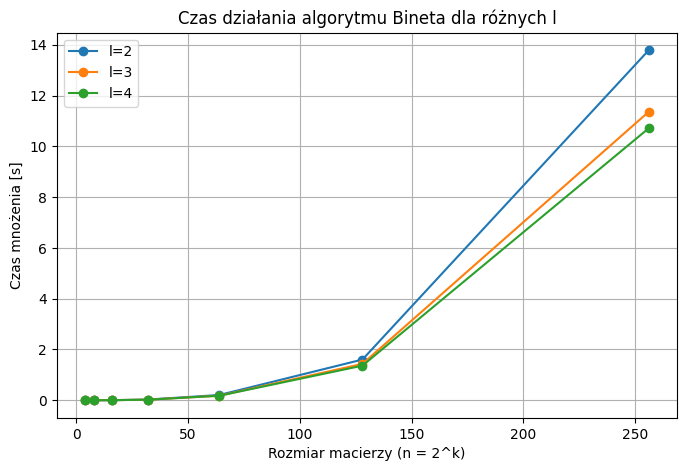

In [47]:
# -----------------------------------
# 1) Wykres: rozmiar vs. czas
# -----------------------------------
plt.figure(figsize=(8, 5))
for l in l_candidates:
    x_sizes, y_times = results_times[l]
    plt.plot(x_sizes, y_times, marker='o', label=f'l={l}')

plt.xlabel('Rozmiar macierzy (n = 2^k)')
plt.ylabel('Czas mnożenia [s]')
plt.title('Czas działania algorytmu Bineta dla różnych l')
plt.legend()
plt.grid(True)
plt.show()

wykres 2

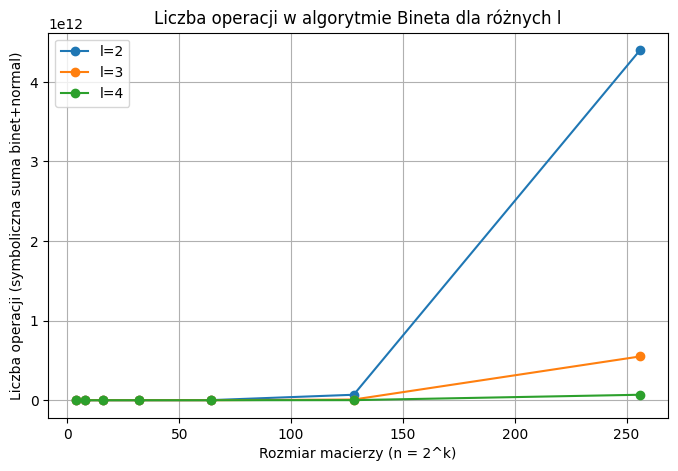

In [48]:
# -----------------------------------
# 2) Drugi wykres: rozmiar vs. liczba operacji
# -----------------------------------
plt.figure(figsize=(8, 5))
for l in l_candidates:
    x_sizes, y_ops = results_ops[l]
    plt.plot(x_sizes, y_ops, marker='o', label=f'l={l}')

plt.xlabel('Rozmiar macierzy (n = 2^k)')
plt.ylabel('Liczba operacji (symboliczna suma binet+normal)')
plt.title('Liczba operacji w algorytmie Bineta dla różnych l')
plt.legend()
plt.grid(True)
plt.show()

Zadanie 3

In [40]:
import numpy as np
from numpy.random import default_rng
from time import time_ns

d = {
    "normal": 0,
    "binet": 0,
    "strassen": 0
}

def normal(A, B, size):
    """Standardowe mnożenie macierzy O(n³)"""
    C = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            for k in range(size):
                C[i][j] += A[i][k] * B[k][j]
                d["normal"] += 2  # 1 mnożenie + 1 dodawanie
    return C

def binet(A, B, size):
    """Rekurencyjny algorytm Bineta"""
    n = A.shape[0]
    if n == 1:
        return A * B

    half = size // 2

    A11, A12, A21, A22 = A[:half, :half], A[:half, half:], A[half:, :half], A[half:, half:]
    B11, B12, B21, B22 = B[:half, :half], B[:half, half:], B[half:, :half], B[half:, half:]

    # 4 rekurencyjne wywołania (Binet)
    C11 = binet(A11, B11, half) + binet(A12, B21, half)
    C12 = binet(A11, B12, half) + binet(A12, B22, half)
    C21 = binet(A21, B11, half) + binet(A22, B21, half)
    C22 = binet(A21, B12, half) + binet(A22, B22, half)

    d["binet"] += 4  # Liczba operacji

    return np.block([[C11, C12], [C21, C22]])

def strassen(A, B, l):
    """Rekurencyjny algorytm Strassena"""
    n = A.shape[0]

    # Jeśli macierz jest mała, użyj Bineta
    if n <= 2**l:
        return binet(A, B, n)

    half = n // 2

    A11, A12, A21, A22 = A[:half, :half], A[:half, half:], A[half:, :half], A[half:, half:]
    B11, B12, B21, B22 = B[:half, :half], B[:half, half:], B[half:, :half], B[half:, half:]

    # 7 rekurencyjnych wywołań (Strassen)
    P1 = strassen(A11 + A22, B11 + B22, l)
    P2 = strassen(A21 + A22, B11, l)
    P3 = strassen(A11, B12 - B22, l)
    P4 = strassen(A22, B21 - B11, l)
    P5 = strassen(A11 + A12, B22, l)
    P6 = strassen(A21 - A11, B11 + B12, l)
    P7 = strassen(A12 - A22, B21 + B22, l)

    # Obliczanie podmacierzy wyniku
    C11 = P1 + P4 - P5 + P7
    C12 = P3 + P5
    C21 = P2 + P4
    C22 = P1 - P2 + P3 + P6

    d["strassen"] += 18  # Liczba operacji

    return np.block([[C11, C12], [C21, C22]])



zbieranie danych

In [41]:
# Zakres k (wielkość macierzy = 2^k) i przykładowe wartości l
k_values = range(2, 9)
l_candidates = [2, 3, 4]

# Zmienimy strukturę pętli tak, by w jednej rundzie
# zebrać zarówno czasy, jak i liczbę operacji.

results_times = {}  # dict: l -> (list_of_sizes, list_of_times)
results_ops   = {}  # dict: l -> (list_of_sizes, list_of_ops)

for l in l_candidates:
    times_for_l = []
    ops_for_l = []
    sizes_for_l = []
    
    for k in k_values:
        size = 2**k
        # Tworzymy losowe macierze (stałe ziarna dla powtarzalności)
        rngA = np.random.default_rng(42)
        rngB = np.random.default_rng(43)
        A = np.trunc(rngA.random((size, size)) * 10)
        B = np.trunc(rngB.random((size, size)) * 10)
        
        # Resetujemy liczniki operacji
        d["strassen"] = 0
        d["binet"] = 0
        
        # Pomiar czasu
        start = time.perf_counter()
        C = strassen(A, B, l)
        end = time.perf_counter()
        
        elapsed = end - start
        total_ops = d["strassen"] + d["binet"]
        
        sizes_for_l.append(size)
        times_for_l.append(elapsed)
        ops_for_l.append(total_ops)
    
    results_times[l] = (sizes_for_l, times_for_l)
    results_ops[l]   = (sizes_for_l, ops_for_l)

wykres 1

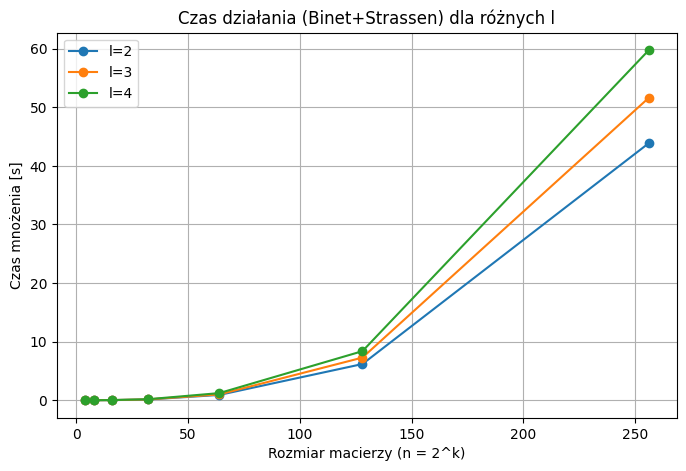

In [42]:
# -----------------------------------
# 1) Wykres: rozmiar vs. czas
# -----------------------------------
plt.figure(figsize=(8, 5))
for l in l_candidates:
    x_sizes, y_times = results_times[l]
    plt.plot(x_sizes, y_times, marker='o', label=f'l={l}')

plt.xlabel('Rozmiar macierzy (n = 2^k)')
plt.ylabel('Czas mnożenia [s]')
plt.title('Czas działania (Binet+Strassen) dla różnych l')
plt.legend()
plt.grid(True)
plt.show()

wykres 2

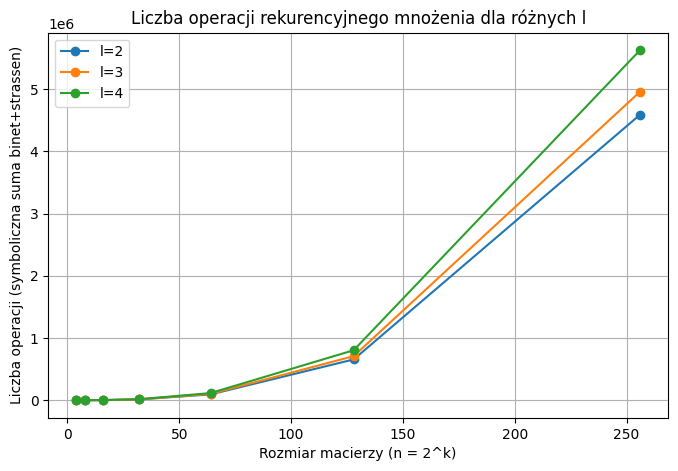

In [43]:
# -----------------------------------
# 2) Drugi wykres: rozmiar vs. liczba operacji
# -----------------------------------
plt.figure(figsize=(8, 5))
for l in l_candidates:
    x_sizes, y_ops = results_ops[l]
    plt.plot(x_sizes, y_ops, marker='o', label=f'l={l}')

plt.xlabel('Rozmiar macierzy (n = 2^k)')
plt.ylabel('Liczba operacji (symboliczna suma binet+strassen)')
plt.title('Liczba operacji rekurencyjnego mnożenia dla różnych l')
plt.legend()
plt.grid(True)
plt.show()

zadanie 4

In [35]:
import numpy as np
import time
import matplotlib.pyplot as plt


d = {
    "strassen": 0,
    "binet": 0
}

def strassen(A, B):
    n = A.shape[0]
    
    if n == 1:
        return A * B
    half = n // 2
    
    A11, A12, A21, A22 = A[:half, :half], A[:half, half:], A[half:, :half], A[half:, half:]
    B11, B12, B21, B22 = B[:half, :half], B[:half, half:], B[half:, :half], B[half:, half:]

    P1 = strassen(A11 + A22, B11 + B22)
    P2 = strassen(A21 + A22, B11)
    P3 = strassen(A11, B12 - B22)
    P4 = strassen(A22, B21 - B11)
    P5 = strassen(A11 + A12, B22)
    P6 = strassen(A21 - A11, B11 + B12)
    P7 = strassen(A12 - A22, B21 + B22)

    C11 = P1 + P4 - P5 + P7
    C12 = P3 + P5
    C21 = P2 + P4
    C22 = P1 - P2 + P3 + P6

    C = np.vstack((np.hstack((C11, C12)), np.hstack((C21, C22))))
    d["strassen"] += 18
    return C

def binet(A, B, size, l):
    if size <= 2**l:
        return strassen(A, B)
    
    half = size // 2
    A11, A12, A21, A22 = A[:half, :half], A[:half, half:], A[half:, :half], A[half:, half:]
    B11, B12, B21, B22 = B[:half, :half], B[:half, half:], B[half:, :half], B[half:, half:]
    
    C1 = np.concatenate((binet(A11, B11, half, l) + binet(A12, B21, half, l), binet(A11, B12, half, l) + binet(A12, B22, half, l)), axis=1)
    C2 = np.concatenate((binet(A21, B11, half, l) + binet(A22, B21, half, l), binet(A21, B12, half, l) + binet(A22, B22, half, l)), axis=1)
    
    d["binet"] += 4
    return np.concatenate((C1, C2), axis=0)



zebranie danych

In [36]:
# Zakres k (wielkość macierzy = 2^k) i przykładowe wartości l
k_values = range(2, 9)
l_candidates = [2, 3, 4]

# Zmienimy strukturę pętli tak, by w jednej rundzie
# zebrać zarówno czasy, jak i liczbę operacji.

results_times = {}  # dict: l -> (list_of_sizes, list_of_times)
results_ops   = {}  # dict: l -> (list_of_sizes, list_of_ops)

for l in l_candidates:
    times_for_l = []
    ops_for_l = []
    sizes_for_l = []
    
    for k in k_values:
        size = 2**k
        # Tworzymy losowe macierze (stałe ziarna dla powtarzalności)
        rngA = np.random.default_rng(42)
        rngB = np.random.default_rng(43)
        A = np.trunc(rngA.random((size, size)) * 10)
        B = np.trunc(rngB.random((size, size)) * 10)
        
        # Resetujemy liczniki operacji
        d["strassen"] = 0
        d["binet"] = 0
        
        # Pomiar czasu
        start = time.perf_counter()
        C = binet(A, B, size, l)
        end = time.perf_counter()
        
        elapsed = end - start
        total_ops = d["strassen"] + d["binet"]
        
        sizes_for_l.append(size)
        times_for_l.append(elapsed)
        ops_for_l.append(total_ops)
    
    results_times[l] = (sizes_for_l, times_for_l)
    results_ops[l]   = (sizes_for_l, ops_for_l)

wykres 1

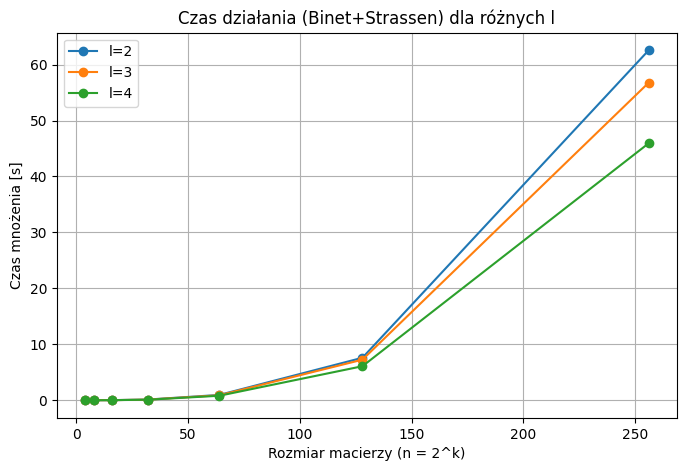

In [37]:
# -----------------------------------
# 1) Wykres: rozmiar vs. czas
# -----------------------------------
plt.figure(figsize=(8, 5))
for l in l_candidates:
    x_sizes, y_times = results_times[l]
    plt.plot(x_sizes, y_times, marker='o', label=f'l={l}')

plt.xlabel('Rozmiar macierzy (n = 2^k)')
plt.ylabel('Czas mnożenia [s]')
plt.title('Czas działania (Binet+Strassen) dla różnych l')
plt.legend()
plt.grid(True)
plt.show()

wykres 2

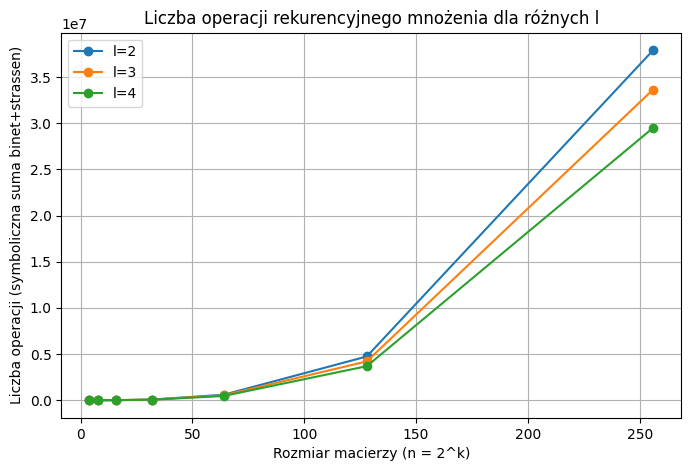

In [38]:
# -----------------------------------
# 2) Drugi wykres: rozmiar vs. liczba operacji
# -----------------------------------
plt.figure(figsize=(8, 5))
for l in l_candidates:
    x_sizes, y_ops = results_ops[l]
    plt.plot(x_sizes, y_ops, marker='o', label=f'l={l}')

plt.xlabel('Rozmiar macierzy (n = 2^k)')
plt.ylabel('Liczba operacji (symboliczna suma binet+strassen)')
plt.title('Liczba operacji rekurencyjnego mnożenia dla różnych l')
plt.legend()
plt.grid(True)
plt.show()